### Data extraction
Extract data from MIMIC-III

In [1]:
import pandas as pd
import nltk.data
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
# Step 1

alive_df = pd.read_csv('data/inputs/PNEUMONIA/alive_df.csv')
dead_df = pd.read_csv('data/inputs/PNEUMONIA/dead_df.csv')

In [6]:
print(f"Number of patients in label_0: {dead_df['SUBJECT_ID_x'].nunique()}")
print(f"Number of patients in label_1: {alive_df['SUBJECT_ID_x'].nunique()}")

Number of patients in label_0: 252
Number of patients in label_1: 1167


In [7]:
import json
# Read json
with open('data/inputs/PNEUMONIA/word_dict.json', 'r') as fp:
    word_dict = json.load(fp)

In [8]:
from functions import find_cooc_per_patient

In [9]:
patient_node_0, patient_cooc_0, patient_note_num_0 = find_cooc_per_patient(dead_df, word_dict, 0.15)
patient_node_1, patient_cooc_1, patient_note_num_1 = find_cooc_per_patient(alive_df, word_dict, 0.15)

100%|██████████| 46134/46134 [06:32<00:00, 117.45it/s]


In [10]:
# Leave only unique values
patient_node_set = set()

for k, v in patient_node_0.items():
    for item in v:
        patient_node_set.add(item)
    
for k, v in patient_node_1.items():
    for item in v:
        patient_node_set.add(item)
        

In [24]:
patient_square_node_data = pd.read_csv('patient_square_node_id_data.csv')
patient_square_node_data

,node,feature,subject
0,chemic,0.458583,positive
1,trabecul,1.939084,positive
2,derecruit,-6.908755,negative
3,ferrou,6.908755,positive
4,rescan,6.908755,positive
...,...,...,...
628,nocturn,6.908755,positive
629,hypotherm,0.574151,positive
630,sundown,4.051736,positive
631,grim,-6.908755,negative


In [25]:
patient_square_node_id_data = patient_square_node_data.set_index("node")
# patient_square_node_id_data['subject'] = "positive"
patient_square_node_id_data

,feature,subject
node,,
chemic,0.458583,positive
trabecul,1.939084,positive
derecruit,-6.908755,negative
ferrou,6.908755,positive
rescan,6.908755,positive
...,...,...
nocturn,6.908755,positive
hypotherm,0.574151,positive
sundown,4.051736,positive


In [26]:
patient_subjects = patient_square_node_id_data["subject"]
patient_subjects

node
chemic       positive
trabecul     positive
derecruit    negative
ferrou       positive
rescan       positive
               ...   
nocturn      positive
hypotherm    positive
sundown      positive
grim         negative
passey       positive
Name: subject, Length: 633, dtype: object

### word2vec embeddings

In [29]:
import os
import numpy as np
disease_name = 'PNEUMONIA'
inputs_path = os.path.join('data/inputs/', disease_name)
word2vec_emb = np.load(os.path.join(inputs_path,'word2vec_emb.npy'), allow_pickle=True)

In [31]:
word2vec_emb[()]['cmo']

array([-0.8066323 ,  0.19347413, -0.3265731 ,  0.00259082, -0.20909826,
       -0.5641059 , -0.17125599,  0.15573174, -0.14354749,  0.4995711 ,
       -0.11297393, -0.09811571,  0.09062582,  0.27914432,  0.0707253 ,
        0.25053233, -0.03134124, -0.15857518, -0.46346655,  0.28511617,
       -0.45286426, -0.26835057,  0.1878681 , -0.6865519 , -0.19370563,
        0.1332928 ,  0.38709563,  0.10285836,  0.12986952, -0.3066607 ,
        0.1285837 , -0.26350123, -0.10404177, -0.370095  ,  0.2494451 ,
       -0.48673669,  0.09443139, -0.17073911,  0.20802887, -0.13547817,
       -0.07109298,  0.21631174,  0.3645164 ,  0.20191373, -0.7054094 ,
       -0.12240005,  0.3851616 ,  0.2893907 ,  0.27980506, -0.44095767,
        0.41978672,  0.09725126,  0.13347931, -0.10672746, -0.00151115,
       -0.09391194, -0.04776734, -0.37134215, -0.12981765, -0.21091804,
        0.38803753,  0.12263253, -0.13310087,  0.45813355, -0.34544885,
       -0.01855165, -0.12493461, -0.10838708,  0.02366725,  0.13

In [32]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in word2vec_emb[()]:
        print(node)
    else:
        emb_list.append(word2vec_emb[()][node])
    

100%|██████████| 633/633 [00:00<00:00, 397811.57it/s]


In [33]:
len(emb_list)

633

In [34]:
emb_list[0]

array([-0.6594952 ,  0.06392883, -0.8239948 ,  0.01320478, -0.05614138,
       -0.37692863,  0.2972587 ,  0.49545008, -0.48002994,  0.41799536,
       -0.05487076, -0.13057098,  0.15034513,  0.42349774, -0.14593755,
       -0.01367405, -0.06695046,  0.08002491, -0.05110053,  0.304626  ,
       -0.26247144, -0.03691824,  0.07035247, -0.7745656 , -0.1013664 ,
        0.15728396,  0.4492481 ,  0.08367784, -0.26834834, -1.0710177 ,
        0.53619033, -0.52421397, -0.19064842, -0.23910944, -0.18174812,
       -0.61428374,  0.2239586 , -0.01447352,  0.02678297, -0.28412238,
       -0.19140156,  0.3556419 ,  0.445474  , -0.00977385, -0.23852922,
        0.29561666,  0.22808512,  0.50874346,  0.3904998 , -0.6192322 ,
        0.5813308 , -0.27359793,  0.16758843,  0.2377653 ,  0.12479714,
       -0.60415983,  0.19642074, -0.2882858 , -0.12563315,  0.0205467 ,
        0.6860242 ,  0.04656629, -0.56958634,  0.2120479 , -0.4859359 ,
        0.53104526, -0.38650516,  0.05499322, -0.40942127,  0.16

### Visualise Node Embeddings generated by word2vec

In [36]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs


In [37]:
# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [38]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [39]:
type(patient_node_embeddings)

numpy.ndarray

In [40]:
patient_node_embeddings.shape

(633, 128)

In [41]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

2021-01-05 20:44:50,190 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-01-05 20:44:50,193 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,193 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,194 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2021-01-05 20:44:50,194 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2021-01-05 20:44:50,194 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2021-01-05 20:44:50,195 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,195 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,196 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBo

2021-01-05 20:44:50,221 - findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,222 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,222 - findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,223 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-05 20:44:50,223 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2021-01-05 20:44:50,224 - findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2021-01-05 20:44:50,224 - findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,224 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-05 20:44:50,225 - findfont: scor

2021-01-05 20:44:50,251 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-01-05 20:44:50,251 - findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,252 - findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-05 20:44:50,252 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,253 - findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,253 - findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal 700 condensed>) = 10.535
2021-01-05 20:44:50,253 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2021-01-05 20:44:50,254 - findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2021-01-05 20:44:50,254 - findfont: score(<Font 'Lo

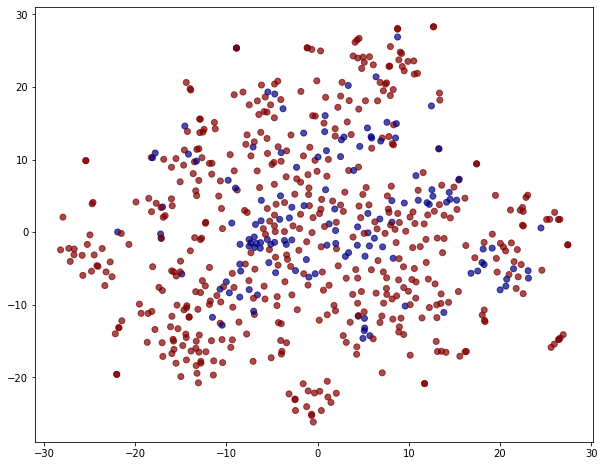

In [42]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### Fasttext

In [43]:
import os
import numpy as np
disease_name = 'PNEUMONIA'
inputs_path = os.path.join('data/inputs/', disease_name)
fasttext_emb = np.load(os.path.join(inputs_path,'fasttext_emb.npy'), allow_pickle=True)

In [44]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in fasttext_emb[()]:
        print(node)
    else:
        emb_list.append(fasttext_emb[()][node])

100%|██████████| 633/633 [00:00<00:00, 350540.59it/s]


In [45]:
emb_list

[array([-0.03475716,  0.43203261,  0.01041297, -0.12556684,  0.43086004,
        -0.2430804 ,  0.4515387 , -0.67327446,  0.01975049,  0.12461535,
         0.80726343,  0.06327413,  0.1411123 , -0.07149468, -0.10357399,
        -0.17585193,  0.14889419, -0.03549973, -0.06807999, -0.21435784,
        -0.01500905, -0.41331193, -0.10152223, -0.42843026,  0.08453922,
        -0.17919143, -0.2046942 ,  0.5358046 , -0.03864779, -0.374906  ,
         0.1828008 , -0.6493899 ,  0.04351637,  0.48564866, -0.05665358,
         0.37074763, -0.4221529 ,  0.0590173 ,  0.40480134, -0.2598971 ,
        -0.22832261, -0.88683796, -0.03106087, -0.4866902 ,  0.572978  ,
        -0.75212246, -0.22988494,  0.20824789, -0.09241674, -0.26682147,
         0.09879909, -0.5250465 , -0.3049758 ,  0.00480926,  0.32525513,
        -0.4877662 , -0.11432321, -0.67563146, -0.38902307,  0.10896944,
        -0.21795736,  0.19382434,  0.20651634, -0.07684605,  0.36661643,
        -0.2395879 , -0.14816764,  0.18106468, -0.3

### Visualise Node Embeddings generated by fasttext

In [46]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [47]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [48]:
type(patient_node_embeddings)

numpy.ndarray

In [49]:
patient_node_embeddings.shape

(633, 128)

In [50]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

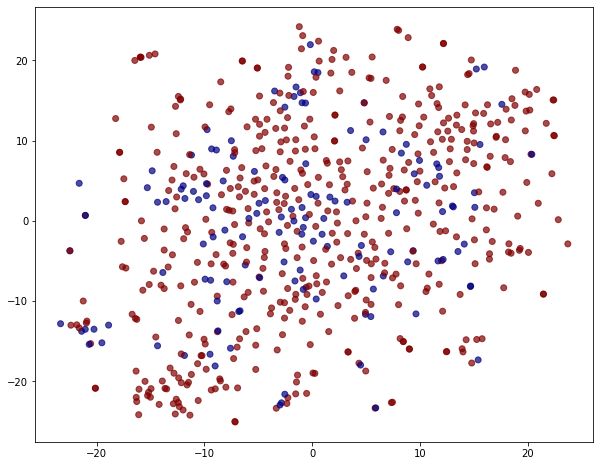

In [51]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### GloVe

In [52]:
import os
import numpy as np
disease_name = 'PNEUMONIA'
inputs_path = os.path.join('data/inputs/', disease_name)
glove_emb = np.load(os.path.join(inputs_path,'glove_emb.npy'), allow_pickle=True)

### Visualise Node Embeddings generated by glove

In [53]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in glove_emb[()]:
        print(node)
    else:
        emb_list.append(glove_emb[()][node])

100%|██████████| 633/633 [00:00<00:00, 763368.15it/s]


In [54]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [55]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [56]:
type(patient_node_embeddings)

numpy.ndarray

In [57]:
patient_node_embeddings.shape

(633, 128)

In [58]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

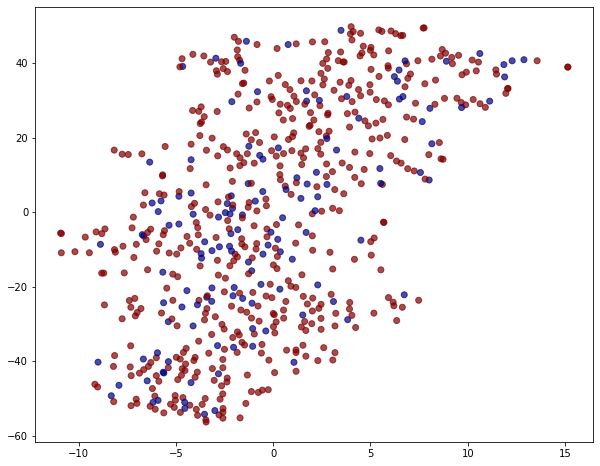

In [59]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### seq2vec not weighted

In [60]:
import os
import numpy as np
disease_name = 'PNEUMONIA'
inputs_path = os.path.join('data/inputs/', disease_name)
sequence2vec_notWeighted = np.load(os.path.join(inputs_path,'sequence2vec_notWeighted.npy'), allow_pickle=True)

### Visualise Node Embeddings generated by seq2vec


In [61]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in sequence2vec_notWeighted[()]:
        print(node)
    else:
        emb_list.append(sequence2vec_notWeighted[()][node])

100%|██████████| 633/633 [00:00<00:00, 393682.45it/s]


In [62]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [63]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [64]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

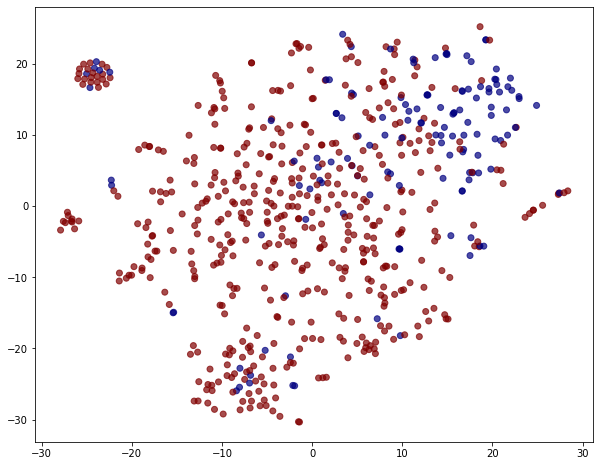

In [65]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### seq2vec

In [66]:
sequence2vec = np.load(os.path.join(inputs_path,'sequence2vec.npy'), allow_pickle=True)

In [67]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in sequence2vec_notWeighted[()]:
        print(node)
    else:
        emb_list.append(sequence2vec_notWeighted[()][node])

100%|██████████| 633/633 [00:00<00:00, 821725.30it/s]


In [68]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [69]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [ ]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

In [ ]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()